### Discription
This notebook is inspired by the IMDB sentiment classification example from Deep Learning with Python by François Chollet and is implemented here for learning purposes with some additional explanations on the basis of my understanding.

# IMDB dataset (a binary classification problem solved via neural networks):
IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # 0 = hide all, 1 = hide INFO, 2 = hide WARNING, 3 = hide ERROR
#The above piece of code is to hide the warnings 

## Loading the data

In [2]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000) #num_words=10000 means keep only top 10000 most frequently occuring words in the training data
print(train_data[0])
print(train_labels[0])

2026-01-26 13:16:55.097303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769433415.335252      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769433415.403778      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769433415.978554      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769433415.978618      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769433415.978621      17 computation_placer.cc:177] computation placer alr

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

Just for fun if we wanna decode the one of the reviews back to english words from these abstract numbers.
The following piece of code decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” 
“start of sequence,” and “unknown.”

In [3]:
word_indices = imdb.get_word_index() #word_index is a dictionary mapping words to an integer 
reverse_word_index = dict([(value,key) for (key,value) in word_indices.items()]) # mapping integer indices to words by reversing word_indices 
decoded_review = " ".join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]) #here '?' is a default value/placeholder; If word does not exist → return "?"
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

## Encoding the integer sequences via multi-hot encoding:
Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vec
tor that would be all 0s except for indices 8 and 5, which would be 1s. It will be performed from scratch here just to understand fully how the logic works 

In [4]:
import numpy as np 
def vectorize_sequence(sequences,dimensions=10000):
    results = np.zeros(shape=(len(sequences),dimensions)) #creates an all 0 matrix of shape =(len(sequences),dimensions) which will be further modified
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1. #sets specific indices or results[i]=1
    return results

X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [5]:
#sample encoded sequence
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


also vectorizing the labels which is as simeple as:

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the model
The input data is vectors, and the labels are scalars (1s and 0s),a type of model that performs well on such a prob
lem is a plain stack of densely connected (Dense) layers with relu activations.

* Two intermediate layers with 16 units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review

In [7]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

* The first argument being passed to each Dense layer is the number of units in thelayer: the dimensionality of representation space of the layer.
* Having 16 units means the weight matrix W will have shape (input_dimension, 16):the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation).
* Having more units (a higher-dimensional representation space) allows your model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).
* The final layer uses a sigmoid activation so as to output a probability (a score between 0 and 1 indicating how likely the sample is to have the target “1”
* A relu (rectified linear unit) is a function meant to zero out negative values, whereas a sigmoid “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability.

## Compiling model by choosing appropreatre optimizer,loss_function and metrics
* Since we are facing a binary classificatio problem the best loss_function is binary_crossentropy (measures how confident the model is in the wrong answer and panalizes accordingly)
* As for the choice of the optimizer, we’ll go with rmsprop, which is a usually a good default choice for virtually any problem.
* And as for metrics we'll be monitoring the accuracy

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

2026-01-26 13:17:23.973013: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Setting aside a validation set
A deep learning model should never be evaluated on its
training data—it’s standard practice to use a validation set to monitor the accuracy of
the model during training. 

In [9]:
X_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training the model
* Our model will be trained for 20 epochs (20 iterations over all samples in the train
ing data) in mini-batches of 512 samples.
* We will also monitor loss and accuracy on the 10,000 samples in the validation set.

In [10]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val,y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6006 - loss: 0.6479 - val_accuracy: 0.7690 - val_loss: 0.5133
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8612 - loss: 0.4503 - val_accuracy: 0.8777 - val_loss: 0.3850
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9112 - loss: 0.3255 - val_accuracy: 0.8520 - val_loss: 0.3650
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9277 - loss: 0.2512 - val_accuracy: 0.8830 - val_loss: 0.2991
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9422 - loss: 0.2024 - val_accuracy: 0.8867 - val_loss: 0.2830
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9508 - loss: 0.1693 - val_accuracy: 0.8870 - val_loss: 0.2783
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9583 - loss: 0.1484 - val_accuracy: 0.8856 - val_loss: 0.2873
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9629 - loss: 0.1293 - val_accuracy: 0.8777 - v

*  The call to model.fit() returns a History object
*  This object has a member history, which is a dictionary containing data about every
thing that happened during training.

In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


The dictionary contains four entries: one per metric that was being monitored during
training and during validation.
Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy.

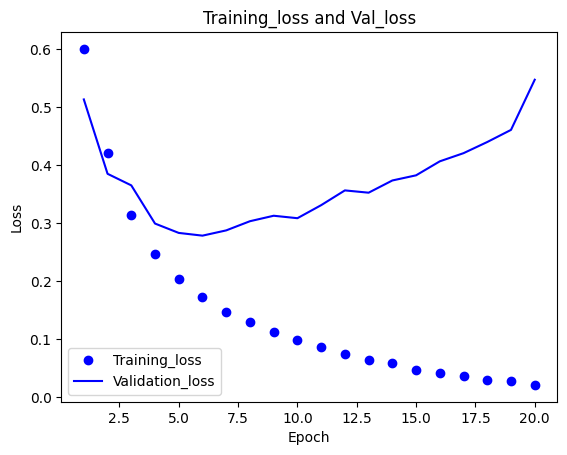

In [12]:
import matplotlib.pyplot as plt
#training_loss vs val_loss
training_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(training_loss_values)+1)
plt.plot(epochs,training_loss_values,'bo',label='Training_loss') #'bo' stands for 'blue dot'
plt.plot(epochs,val_loss_values,'b',label='Validation_loss') #'b' stands for 'blue line'
plt.title('Training_loss and Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

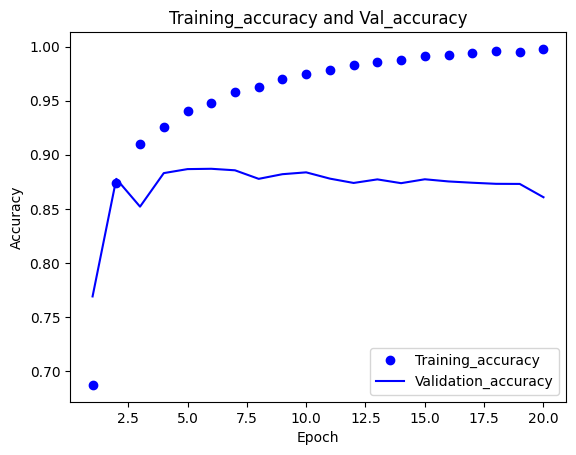

In [13]:
#training_accuracy vs validation_accuracy
training_acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs,training_acc_values,'bo',label='Training_accuracy') 
plt.plot(epochs,val_acc_values,'b',label='Validation_accuracy') 
plt.title('Training_accuracy and Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*  The training loss decreases with every epoch, and the training accuracy
increases with every epoch. Expected behaviour since we are running gradient descent.
*  For the validation loss and accuracy: they seem to peak at the fourth epoch.
*  In precise terms this is overfitting, after the fourth epoch, we’re overoptimizing on the training data, and we
end up learning representations that are specific to the training data and don’t gener
alize to data outside of the training set.

## Retraining a new model from scratch
Learning from the above mistake lets build a model from scratch for 4 epochs this time and then evaluate it on test data

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=4,batch_size=512)
results= model.evaluate(X_test,y_test)
print(results)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7336 - loss: 0.5493
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9038 - loss: 0.2759
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9220 - loss: 0.2179
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9411 - loss: 0.1714
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8826 - loss: 0.2930
[0.28998544812202454, 0.8849999904632568]


0.29 is the test loss, and 0.879 is the test accuracy stating that the model was ~87.9% accurate 

## Using the trained model to make predictions on new data (test data)

In [15]:
model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.1892043 ],
       [0.99951625],
       [0.8484212 ],
       ...,
       [0.13810821],
       [0.07949267],
       [0.7312942 ]], dtype=float32)

It returns the probability of the review being positive '1', the model is confident for some samples (0.99 or more, or 0.01 or
less) but less confident for others (0.6, 0.4). These probabilities can be hanged into 1's and 0's by initiating a threshold.

## Key Takeaways:
* We usually need to do quite a bit of preprocessing on your raw data in order to
be able to feed it—as tensors—into a neural network.
* Sequences of words canbe encoded as binary vectors, but there are other encoding options too.
* In a binary classification problem (two output classes), your model should end
with a Dense layer with one unit and a sigmoid activation:  the output of your
model should be a scalar between 0 and 1
* On a binary classification problem, the loss function you should use is binary_crossentropy.
* The rmsprop optimizer is generally a good enough choice, whatever your problem.
* As they get better on their training data, neural networks eventually start over
fitting and end up obtaining increasingly worse results on data they’ve never
seen before.
* Always make sure to monitor performance on the data outside the training set / maintain a validation set. 